# Final Project Workbook
## Song Ranking Analysis
This data set, sourced from Kaggle, contains information about the weekly billboard top 100 charts from 1959-2019. Song title is considered ID. Artist, Lyrics, and Year are also kept as predictor variables. The target is rank.

### Data Engineering
This section of code is meant to process the data and create new variables.

In [3]:
import pandas as pd
import numpy as np


In [2]:
songDf = pd.read_csv("all_songs_data.csv")

In [3]:
songDf = songDf[['Song Title', 'Rank', 'Lyrics', 'Artist', 'Year']]
songDf = songDf[songDf['Year'] < 2020]

#### Processing Lyrics
This subsection processes the lyrics.

In [4]:
songDf['Lyrics'] = songDf['Lyrics'].astype(str)

songNum = 1

def removeSquareBrackets(lyrics):
    global songNum
    print(songNum)
    songNum += 1
    while True:
        start = lyrics.find('[')
        end = lyrics.find(']')

        if start == -1 or end == -1:
            break

        lyrics = lyrics[:start] + lyrics[end + 1:]
    return lyrics.strip()

songDf['Lyrics'] = songDf['Lyrics'].apply(removeSquareBrackets)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


These two lines add columns for the length of song (defined by the number of characters) and a counter for the number of exclamation points in a song.

In [5]:
def exclamationCounter(X):
    toReturn = 0
    for i in X:
        if i == '!':
            toReturn += 1

    return toReturn

In [6]:
songDf['songLength'] = songDf['Lyrics'].apply(len)
songDf['numExclamation'] = songDf['Lyrics'].apply(exclamationCounter)

These functions are used to count the number of complex words and the number of simple words used in a song. A ratio is also created.

In [7]:
def letterCounterSmall(X):
    toReturn = 0
    for i in X.split():
        if len(i) < 5:
            toReturn += 1

    return toReturn

def letterCounterBig(X):
    toReturn = 0
    for i in X.split():
        if len(i) > 5:
            toReturn += 1

    return toReturn

def wordCounter(X):
    toReturn = 0
    for i in X.split():
        toReturn += 1
    return toReturn

In [8]:
songDf['numBigWords'] = songDf['Lyrics'].apply(letterCounterBig)
songDf['numSmallWords'] = songDf['Lyrics'].apply(letterCounterSmall)
songDf['numWords'] = songDf['Lyrics'].apply(wordCounter)
songDf['percentSmall'] = songDf['numSmallWords'] / songDf['numWords']
songDf['percentBig'] = songDf['numBigWords'] / songDf['numWords']

In [11]:
songDf.to_csv('finalSet.csv')

### Exploratory Data Analysis
This section of code is meant to depict general trends in some of the features.

In [32]:
import matplotlib.pyplot as plt

#### Five number summaries for each numerical variable

In [33]:
summary = songDf['numBigWords'].describe()
five_number_summary = {
    'min': summary['min'],
    'Q1': summary['25%'],
    'median': summary['50%'],
    'Q3': summary['75%'],
    'max': summary['max']
}

print(five_number_summary)
print(f'The mean is {np.mean(songDf['numBigWords'])} and the standard deviation is {np.std(songDf['numBigWords'])}')

{'min': 0.0, 'Q1': 31.0, 'median': 47.0, 'Q3': 73.0, 'max': 42079.0}
The mean is 133.77852459016393 and the standard deviation is 1254.8722155431146


In [34]:
summary = songDf['numSmallWords'].describe()
five_number_summary = {
    'min': summary['min'],
    'Q1': summary['25%'],
    'median': summary['50%'],
    'Q3': summary['75%'],
    'max': summary['max']
}

print(five_number_summary)
print(f'The mean is {np.mean(songDf['numSmallWords'])} and the standard deviation is {np.std(songDf['numSmallWords'])}')

{'min': 0.0, 'Q1': 143.0, 'median': 205.0, 'Q3': 296.0, 'max': 96589.0}
The mean is 401.0527868852459 and the standard deviation is 3169.0637597888413


In [35]:
summary = songDf['numWords'].describe()
five_number_summary = {
    'min': summary['min'],
    'Q1': summary['25%'],
    'median': summary['50%'],
    'Q3': summary['75%'],
    'max': summary['max']
}

print(five_number_summary)
print(f'The mean is {np.mean(songDf['numWords'])} and the standard deviation is {np.std(songDf['numWords'])}')

{'min': 0.0, 'Q1': 209.0, 'median': 296.0, 'Q3': 426.0, 'max': 149170.0}
The mean is 619.5888524590164 and the standard deviation is 5043.893995890216


In [36]:
summary = songDf['percentSmall'].describe()
five_number_summary = {
    'min': summary['min'],
    'Q1': summary['25%'],
    'median': summary['50%'],
    'Q3': summary['75%'],
    'max': summary['max']
}

print(five_number_summary)
print(f'The mean is {np.mean(songDf['percentSmall'])} and the standard deviation is {np.std(songDf['percentSmall'])}')

{'min': 0.0, 'Q1': 0.6451158564288959, 'median': 0.6923076923076923, 'Q3': 0.7386227381730979, 'max': 1.0}
The mean is 0.69118711129115 and the standard deviation is 0.09312149433695648


In [37]:
summary = songDf['percentBig'].describe()
five_number_summary = {
    'min': summary['min'],
    'Q1': summary['25%'],
    'median': summary['50%'],
    'Q3': summary['75%'],
    'max': summary['max']
}

print(five_number_summary)
print(f'The mean is {np.mean(songDf['percentBig'])} and the standard deviation is {np.std(songDf['percentBig'])}')

{'min': 0.0, 'Q1': 0.12333214730475003, 'median': 0.16071428571428573, 'Q3': 0.20146569311714807, 'max': 1.0}
The mean is 0.16799972633646718 and the standard deviation is 0.08051044233932309


In [38]:
summary = songDf['songLength'].describe()
five_number_summary = {
    'min': summary['min'],
    'Q1': summary['25%'],
    'median': summary['50%'],
    'Q3': summary['75%'],
    'max': summary['max']
}

print(five_number_summary)
print(f'The mean is {np.mean(songDf['songLength'])} and the standard deviation is {np.std(songDf['songLength'])}')

{'min': 0.0, 'Q1': 1039.0, 'median': 1473.0, 'Q3': 2121.25, 'max': 825001.0}
The mean is 3230.4818032786884 and the standard deviation is 26852.725743590512


In [39]:
summary = songDf['numExclamation'].describe()
five_number_summary = {
    'min': summary['min'],
    'Q1': summary['25%'],
    'median': summary['50%'],
    'Q3': summary['75%'],
    'max': summary['max']
}

print(five_number_summary)
print(f'The mean is {np.mean(songDf['numExclamation'])} and the standard deviation is {np.std(songDf['numExclamation'])}')

{'min': 0.0, 'Q1': 0.0, 'median': 0.0, 'Q3': 0.0, 'max': 670.0}
The mean is 2.52327868852459 and the standard deviation is 24.092321388897737


In [40]:
print(f'The number of artists in the dataset is {len(songDf["Artist"].unique())}')
print(f"The 5 most prolific artists are {songDf['Artist'].value_counts().head(5)}")

The number of artists in the dataset is 2970
The 5 most prolific artists are Artist
Madonna         35
Beatles         27
Elton John      26
Mariah Carey    25
Taylor Swift    23
Name: count, dtype: int64


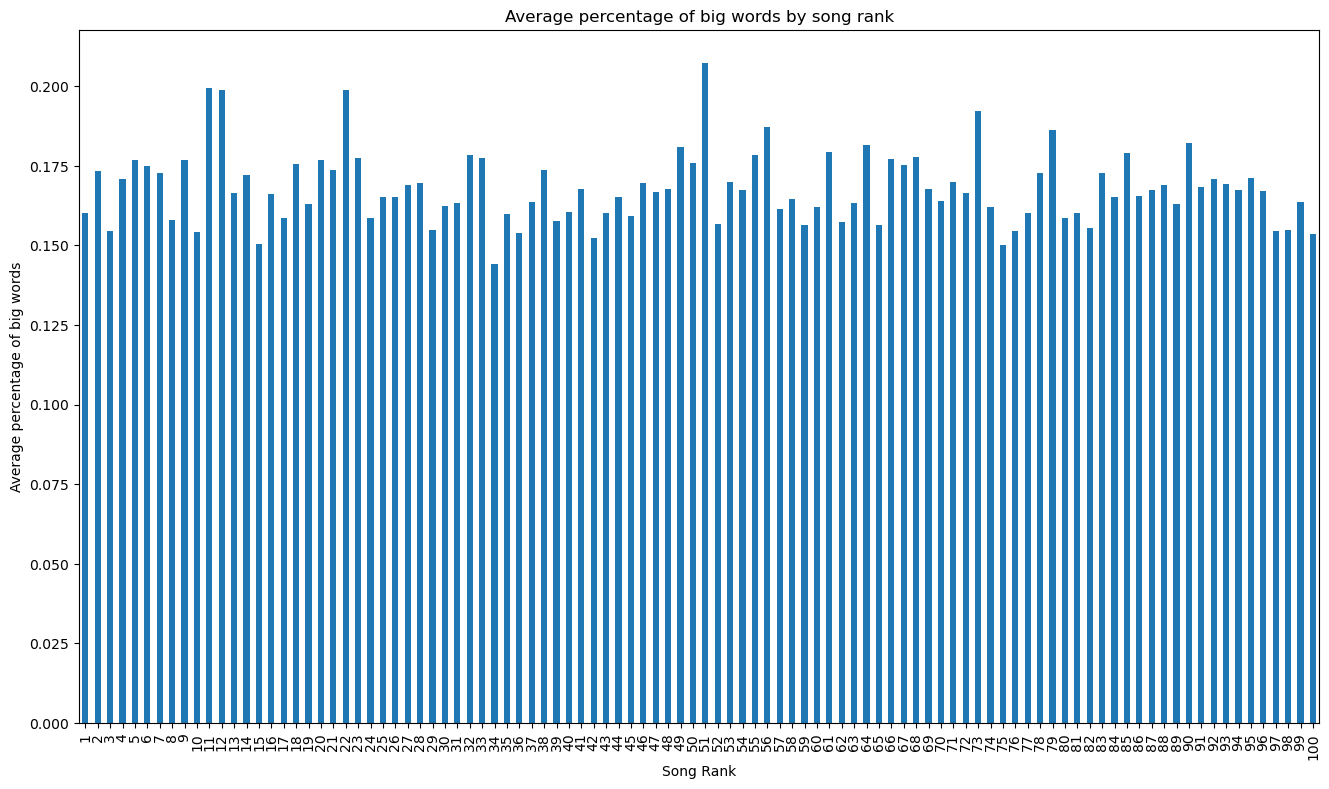

In [41]:
plt.figure(figsize=(16, 9))
songDf.groupby('Rank')['percentBig'].mean().plot(kind = 'bar')
plt.xlabel('Song Rank')
plt.ylabel('Average percentage of big words')
plt.title('Average percentage of big words by song rank')
plt.savefig('graph1')
plt.show()

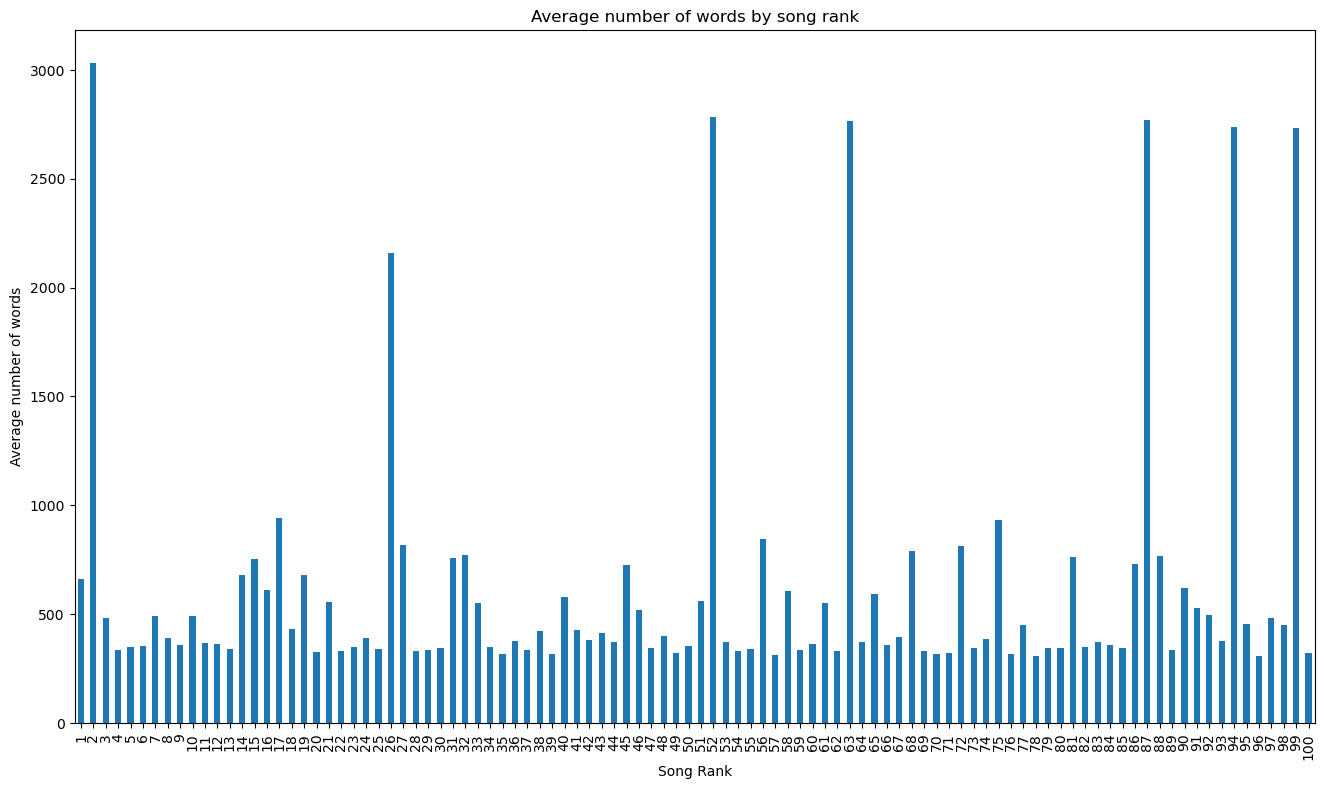

In [42]:
plt.figure(figsize=(16, 9))
songDf.groupby('Rank')['numWords'].mean().plot(kind = 'bar')
plt.xlabel('Song Rank')
plt.ylabel('Average number of words')
plt.title('Average number of words by song rank')
plt.savefig('graph2')
plt.show()

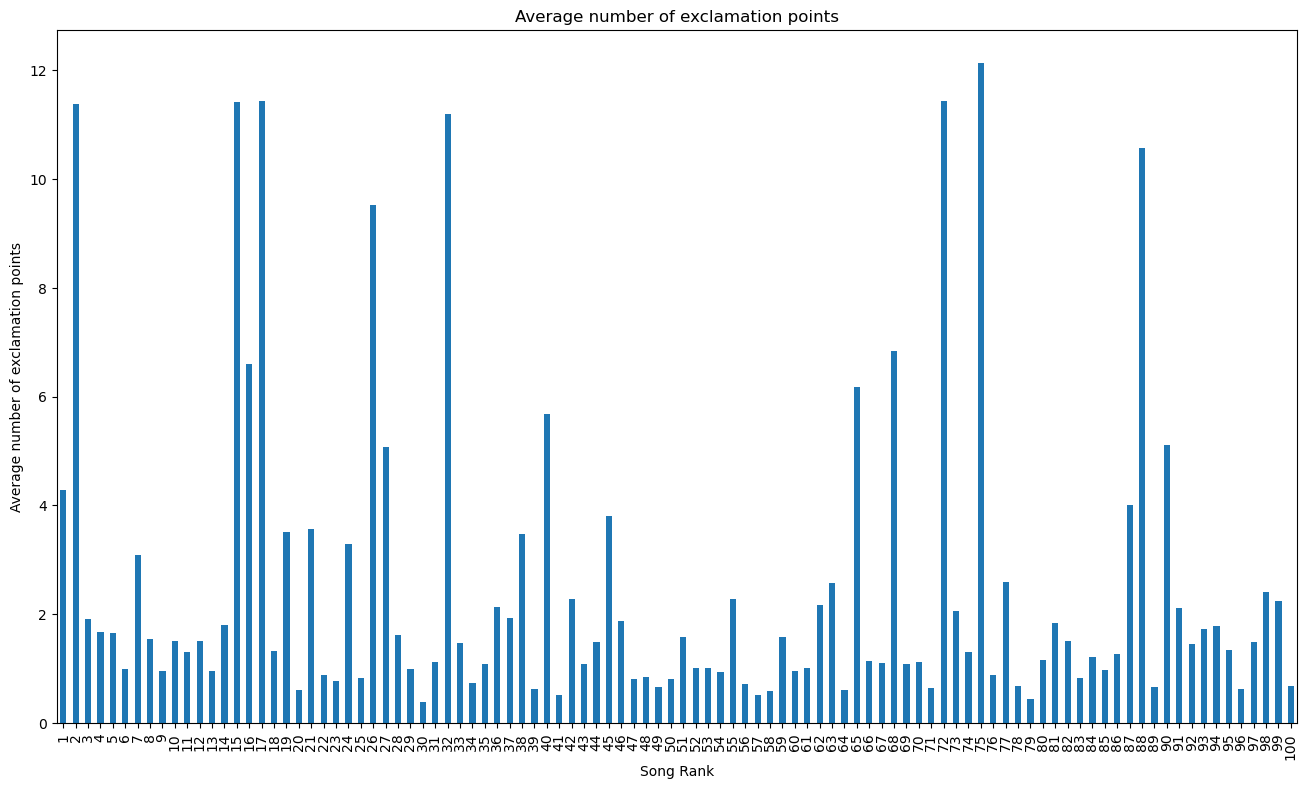

In [43]:
plt.figure(figsize=(16, 9))
songDf.groupby('Rank')['numExclamation'].mean().plot(kind = 'bar')
plt.xlabel('Song Rank')
plt.ylabel('Average number of exclamation points')
plt.title('Average number of exclamation points')
plt.savefig('graph3')
plt.show()

## Machine Learning Methods
This is the begining of the section where we start diving into the data

### Supervised Learning Methods

#### KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet

In [5]:
songDf = pd.read_csv('finalSet.csv')

songDf['Lyrics'] = songDf['Lyrics'].fillna('')
vectorizer = TfidfVectorizer(min_df = 25, max_df=3000)
xTransformed = vectorizer.fit_transform(songDf['Lyrics'])

xTrain, xTest, yTrain, yTest = train_test_split(xTransformed, songDf['Rank'], random_state=307, test_size=0.2)


reducedTable = songDf[['songLength', 'numExclamation', 'numSmallWords', 'numBigWords', 'numWords', 'percentSmall', 'percentBig','Year']]

reducedTable = reducedTable.fillna(0)

xTrainVariousVariables, xTestVariousVariables, yTrainVariousVariables, yTestVariousVariables = train_test_split(
    reducedTable, songDf['Rank'], random_state=307, test_size=0.2)

In [6]:

regressorVectorKNN = KNeighborsRegressor(algorithm = 'ball_tree')

parameterGrid = {
    'n_neighbors': [2, 3, 10, 20, 50, 100],
    'leaf_size': [10, 20, 30, 60],
    'weights': ['distance', 'uniform'],
    'p': [1, 2]
}

grid_search = GridSearchCV(regressorVectorKNN, parameterGrid, cv=5, scoring='r2')
grid_search.fit(xTrain, yTrain)

print("Best parameters:", grid_search.best_params_)
print("Best R^2 score:", grid_search.best_score_)

c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\neighbors\_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\neighbors\_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\neighbors\_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\neighbors\_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\neighbors\_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  

Best parameters: {'leaf_size': 10, 'n_neighbors': 100, 'p': 2, 'weights': 'uniform'}
Best R^2 score: -0.0006294412456806953


c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\neighbors\_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\legoe\miniconda3\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\neighbors\_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


In [7]:
regressorKNN = KNeighborsRegressor(algorithm = 'brute')

parameterGrid = {
    'n_neighbors': [2, 3, 10, 20, 50],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(regressorKNN, parameterGrid, cv=5, scoring='r2')
grid_search.fit(xTrainVariousVariables, yTrainVariousVariables)

print("Best parameters:", grid_search.best_params_)
print("Best R^2 score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 50, 'p': 2, 'weights': 'uniform'}
Best R^2 score: -0.015248267337160292


#### Regression Models

In [8]:
linearVector = LinearRegression()
linearVector.fit(xTrain, yTrain)


print(f'The best R^2 score is: {r2_score(yTest, linearVector.predict(xTest))}')

The best R^2 score is: -11.69897851723101


In [ ]:
elasticNetModel = ElasticNet()
parameterGridLinear = {
    'alpha' : [0.01, 0.1, 1, 10, 100],
    'l1_ratio' : [0, 0.25, 0.5, 0.75, 1],
    'max_iter' : [100, 1000, 10000, 100000],
    'selection' : ['cyclic', 'random'],
    'tol' : [0.000001, 0.00001, 0.0001, 0.001]
}

randomSearchNet = RandomizedSearchCV(elasticNetModel, parameterGridLinear, cv = 5, scoring = 'r2')
randomSearchNet.fit(xTrainVariousVariables, yTrainVariousVariables)

print("Best parameters:", randomSearchNet.best_params_)
print("Best R^2 score:", randomSearchNet.best_score_)

c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.600e+06, tolerance: 3.203e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.600e+06, tolerance: 3.202e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.lin

Best parameters: {'tol': 1e-05, 'selection': 'cyclic', 'max_iter': 100, 'l1_ratio': 0.25, 'alpha': 100}
Best R^2 score: -0.0010634226796105485


c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.719e+06, tolerance: 4.034e+01
  model = cd_fast.enet_coordinate_descent(


#### Random Forest

In [9]:
forestVector = RandomForestRegressor()

forestGrid = {
    'n_estimators' : [100, 200, 300],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'bootstrap' : [True, False],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 3, 5]
}

randomSearchTree = RandomizedSearchCV(forestVector, forestGrid, cv = 5, scoring = 'r2')

In [ ]:

randomSearchTree.fit(xTrain, yTrain)

print("Best parameters:", randomSearchTree.best_params_)
print("Best R^2 score:", randomSearchTree.best_score_)

c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\legoe\miniconda3\Lib\site-pack

Best parameters: {'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}
Best R^2 score: -0.006527999444073273


In [10]:
randomSearchTree.fit(xTrainVariousVariables, yTrainVariousVariables)

print("Best parameters:", randomSearchTree.best_params_)
print("Best R^2 score:", randomSearchTree.best_score_)

c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\legoe\miniconda3\Lib\site-pack

Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': True}
Best R^2 score: -0.0441519679964137


#### Adaboost

In [11]:
adaBoost = AdaBoostRegressor()

boostGrid = {
    'n_estimators' : [25, 75, 100, 500],
    'learning_rate' : [0.01, 0.1, 1, 1.5],
    'loss' : ['linear', 'square', 'exponential']
}

randomSearchAda = RandomizedSearchCV(adaBoost, boostGrid, cv = 5, scoring = 'r2')
randomSearchAda.fit(xTrain, yTrain)

print("Best parameters:", randomSearchAda.best_params_)
print("Best R^2 score:", randomSearchAda.best_score_)

Best parameters: {'n_estimators': 100, 'loss': 'square', 'learning_rate': 1}
Best R^2 score: 0.0002568344507318798


In [12]:
randomSearchAda.fit(xTrainVariousVariables, yTrainVariousVariables)

print("Best parameters:", randomSearchAda.best_params_)
print("Best R^2 score:", randomSearchAda.best_score_)

Best parameters: {'n_estimators': 75, 'loss': 'linear', 'learning_rate': 0.1}
Best R^2 score: 0.0007901892340693051


### Deep Learning Model

#### Lyrical data Neural Network

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense, InputLayer
import optuna

c:\Users\legoe\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
def parameterOptimization(option):
    layer1 = option.suggest_int('layer1', 10, 100)
    layer2 = option.suggest_int('layer2', 50, 400)
    layer3 = option.suggest_int('layer3', 100, 600)
    layer4 = option.suggest_int('layer4', 50, 400)
    layer5 = option.suggest_int('layer5', 10, 100)

    actLayer1 = option.suggest_categorical('actLayer1', ['tanh', 'relu', 'sigmoid'])
    actLayer2 = option.suggest_categorical('actLayer2', ['tanh', 'relu', 'sigmoid'])
    actLayer3 = option.suggest_categorical('actLayer3', ['tanh', 'relu', 'sigmoid'])
    actLayer4 = option.suggest_categorical('actLayer4', ['tanh', 'relu', 'sigmoid'])
    actLayer5 = option.suggest_categorical('actLayer5', ['tanh', 'relu', 'sigmoid'])

    batch_size = option.suggest_int('batch_size', 16, 128)
    
    
    model = Sequential([
        InputLayer(input_shape=[3727]),
        Flatten(),
        Dense(layer1, activation = actLayer1),
        Dense(layer2, activation = actLayer2),
        Dense(layer3, activation = actLayer3),
        Dense(layer4, activation = actLayer4),
        Dense(layer4, activation = actLayer5),
        Dense(1, activation = "linear")
    ])
    
    model.compile(
        loss = "mean_squared_error",
        optimizer = "adam",
        metrics = ["mean_squared_error"]
    )
    
    model.fit(
        xTrain, yTrain,
        batch_size=batch_size,
        epochs=10,
        validation_data=(xTest, yTest),
        verbose = False  
    )
    
    val_loss = model.evaluate(xTest, yTest, verbose = False)
    return val_loss[0] 

study = optuna.create_study(direction = 'minimize') 
study.optimize(parameterOptimization, n_trials = 25)

print("Best parameters:", study.best_params)

[I 2024-12-10 11:04:44,705] A new study created in memory with name: no-name-8bd9294f-21b9-4f70-836c-57501b86c167
c:\Users\legoe\miniconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
[I 2024-12-10 11:04:49,177] Trial 0 finished with value: 860.7460327148438 and parameters: {'layer1': 84, 'layer2': 91, 'layer3': 337, 'layer4': 259, 'layer5': 85, 'actLayer1': 'relu', 'actLayer2': 'sigmoid', 'actLayer3': 'tanh', 'actLayer4': 'relu', 'actLayer5': 'sigmoid', 'batch_size': 111}. Best is trial 0 with value: 860.7460327148438.
[I 2024-12-10 11:04:53,991] Trial 1 finished with value: 861.7836303710938 and parameters: {'layer1': 48, 'layer2': 196, 'layer3': 104, 'layer4': 396, 'layer5': 52, 'actLayer1': 'sigmoid', 'actLayer2': 'relu', 'actLayer3': 'relu', 'actLayer4': 'relu', 'actLayer5': 'tanh', 'batch_size': 72}. Best is trial 0 with value: 860.7460327148438.
[I 2024-12-10 11:05:01,038] Tri

Best parameters: {'layer1': 17, 'layer2': 374, 'layer3': 191, 'layer4': 318, 'layer5': 36, 'actLayer1': 'sigmoid', 'actLayer2': 'sigmoid', 'actLayer3': 'tanh', 'actLayer4': 'relu', 'actLayer5': 'sigmoid', 'batch_size': 20}


In [23]:
def parameterOptimization(option):
    layer1 = option.suggest_int('layer1', 10, 100)
    layer2 = option.suggest_int('layer2', 50, 400)
    layer3 = option.suggest_int('layer3', 100, 600)
    layer4 = option.suggest_int('layer4', 50, 400)
    layer5 = option.suggest_int('layer5', 10, 100)

    actLayer1 = option.suggest_categorical('actLayer1', ['tanh', 'relu', 'sigmoid'])
    actLayer2 = option.suggest_categorical('actLayer2', ['tanh', 'relu', 'sigmoid'])
    actLayer3 = option.suggest_categorical('actLayer3', ['tanh', 'relu', 'sigmoid'])
    actLayer4 = option.suggest_categorical('actLayer4', ['tanh', 'relu', 'sigmoid'])
    actLayer5 = option.suggest_categorical('actLayer5', ['tanh', 'relu', 'sigmoid'])

    batch_size = option.suggest_int('batch_size', 16, 128)
    
    
    model = Sequential([
        InputLayer(input_shape=[8]),
        Flatten(),
        Dense(layer1, activation = actLayer1),
        Dense(layer2, activation = actLayer2),
        Dense(layer3, activation = actLayer3),
        Dense(layer4, activation = actLayer4),
        Dense(layer4, activation = actLayer5),
        Dense(1, activation = "linear")
    ])
    
    model.compile(
        loss = "mean_squared_error",
        optimizer = "adam",
        metrics = ["mean_squared_error"]
    )
    
    model.fit(
        xTrainVariousVariables, yTrainVariousVariables,
        batch_size=batch_size,
        epochs=10,
        validation_data=(xTestVariousVariables, yTestVariousVariables),
        verbose = False  
    )
    
    val_loss = model.evaluate(xTestVariousVariables, yTestVariousVariables, verbose = False)
    return val_loss[0] 

study = optuna.create_study(direction = 'minimize') 
study.optimize(parameterOptimization, n_trials = 25)

print("Best parameters:", study.best_params)

[I 2024-12-10 11:41:40,971] A new study created in memory with name: no-name-cb07cfc8-8958-4e34-a52d-4c8ede904021
c:\Users\legoe\miniconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
[I 2024-12-10 11:41:44,068] Trial 0 finished with value: 859.1532592773438 and parameters: {'layer1': 49, 'layer2': 325, 'layer3': 352, 'layer4': 136, 'layer5': 63, 'actLayer1': 'relu', 'actLayer2': 'relu', 'actLayer3': 'sigmoid', 'actLayer4': 'tanh', 'actLayer5': 'tanh', 'batch_size': 81}. Best is trial 0 with value: 859.1532592773438.
c:\Users\legoe\miniconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
[I 2024-12-10 11:41:48,798] Trial 1 finished with value: 894.6113891601562 and parameters: {'layer1': 82, 'layer2': 250, 'layer3': 415, 'layer4': 375, 'layer5': 99, 'actLayer1': 'sigmoid', 'actLayer2

Best parameters: {'layer1': 60, 'layer2': 163, 'layer3': 383, 'layer4': 148, 'layer5': 38, 'actLayer1': 'relu', 'actLayer2': 'relu', 'actLayer3': 'sigmoid', 'actLayer4': 'tanh', 'actLayer5': 'tanh', 'batch_size': 91}


### Analysis of Variables

#### Shap

In [53]:
import shap

In [77]:
xReducedTransformed.shape[1]

119

In [76]:
with open('stopwords.txt') as f:
    sw = f.read().split()

vectorizer = TfidfVectorizer(min_df = 100, stop_words = sw)
sampleDf = songDf.sample(n = 1000)
xReducedTransformed = vectorizer.fit_transform(sampleDf['Lyrics'])

rf = RandomForestRegressor() #Parameters from random search
rf.fit(xReducedTransformed, sampleDf['Rank'])

RandomForestRegressor()

In [78]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(xReducedTransformed.toarray())


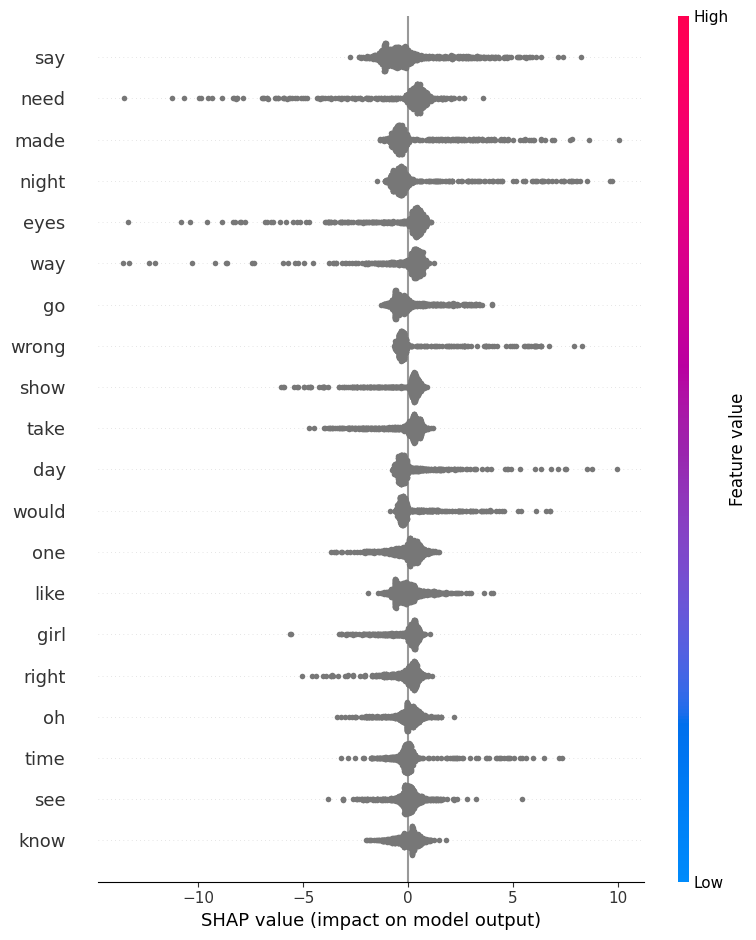

In [79]:
shap_values_class1 = shap_values[:, 1]
exp = shap.Explanation(values=shap_values_class1, 
                       base_values=explainer.expected_value[0], 
                       data=xReducedTransformed.toarray(), 
                       feature_names=vectorizer.get_feature_names_out())
shap.summary_plot(shap_values, xReducedTransformed, feature_names=exp.feature_names)

#### PCA, TSNE

##### PCA

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [41]:
twoComponentsPCA = PCA(n_components = 2)

xReduced = twoComponentsPCA.fit_transform(xTrainVariousVariables)
colors = plt.cm.tab10(pd.cut(yTrainVariousVariables, bins = 10, labels = False) / 9)

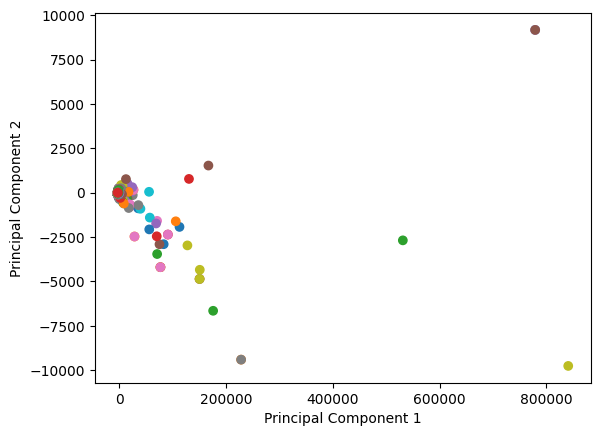

In [42]:
plt.scatter(xReduced[:, 0], xReduced[:, 1], c = colors)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [43]:
print(f'The variance captured is {twoComponentsPCA.explained_variance_ratio_.sum()}')

The variance captured is 0.9999948168295955


##### TSNE

In [45]:
from sklearn.manifold import TSNE

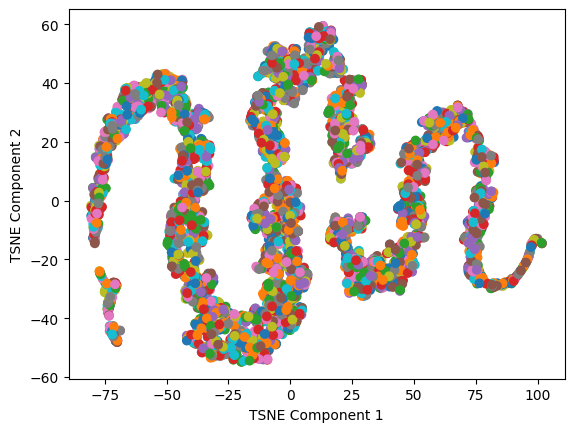

In [46]:
tsne = TSNE(perplexity = 30, n_components = 2)
tsneDefault = tsne.fit_transform(xTrainVariousVariables)
plt.scatter(tsneDefault[:, 0], tsneDefault[:, 1], c = colors)
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.show()

### Non-class Methods (Outlier Resistant Regression)

In [7]:
from sklearn.linear_model import RANSACRegressor, HuberRegressor, TheilSenRegressor
from sklearn.tree import DecisionTreeRegressor

#### Ransac Regression

In [82]:
ransac = RANSACRegressor()

ransacGrid = {
    'estimator' : [LinearRegression(), DecisionTreeRegressor()]
}

ransacLyrics = GridSearchCV(ransac, ransacGrid, cv = 5, scoring = 'r2')
ransacLyrics.fit(xTrain, yTrain)

print("Best parameters:", ransacLyrics.best_params_)
print("Best R^2 score:", ransacLyrics.best_score_)

c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\utils\validation.py", line 66, in inner_f
    return f(*ar

Best parameters: {'estimator': LinearRegression()}
Best R^2 score: -109.76591116105351


In [83]:
ransacVariables = GridSearchCV(ransac, ransacGrid, cv = 5, scoring = 'r2')
ransacVariables.fit(xTrainVariousVariables, yTrainVariousVariables)

print("Best parameters:", ransacVariables.best_params_)
print("Best R^2 score:", ransacVariables.best_score_)

Best parameters: {'estimator': LinearRegression()}
Best R^2 score: -156.1661033129138


c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\utils\validation.py", line 66, in inner_f
    return f(*ar

#### Huber Regression

In [84]:
huber = HuberRegressor()

huberGrid = {
    'epsilon' : [0.5, 1, 1.5, 3, 10],
    'alpha' : [0.000001, 0.0005, 0.001, 0.05, 0.1],
    'max_iter' : [50, 100, 200, 300],
    'fit_intercept' : [True, False]
}

huberLyrics = RandomizedSearchCV(huber, huberGrid, cv = 5, scoring = 'r2')
huberLyrics.fit(xTrain, yTrain)

print("Best parameters:", huberLyrics.best_params_)
print("Best R^2 score:", huberLyrics.best_score_)

c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iter

Best parameters: {'max_iter': 50, 'fit_intercept': True, 'epsilon': 1.5, 'alpha': 0.001}
Best R^2 score: -0.5673408134357574


c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [85]:
huberVarious = RandomizedSearchCV(huber, huberGrid, cv = 5, scoring = 'r2')
huberVarious.fit(xTrainVariousVariables, yTrainVariousVariables)

print("Best parameters:", huberVarious.best_params_)
print("Best R^2 score:", huberVarious.best_score_)

c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iter

Best parameters: {'max_iter': 200, 'fit_intercept': False, 'epsilon': 10, 'alpha': 0.1}
Best R^2 score: -0.0031272354018966773


c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\legoe\miniconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iter

#### Theil-sen Regression

In [ ]:
theil = TheilSenRegressor()

theilGrid = {
    'max_subpopulation' : [50, 100, 200],
    'n_subsamples' : [3800, 5000],
    'fit_intercept' : [True, False]
}

theilLyrics = RandomizedSearchCV(theil, theilGrid, cv = 5, scoring = 'r2')
theilLyrics.fit(np.asarray(xTrain.todense()), yTrain)

print("Best parameters:", theilLyrics.best_params_)
print("Best R^2 score:", theilLyrics.best_score_)

In [ ]:
theilVarious = RandomizedSearchCV(theil, theilGrid, cv = 5, scoring = 'r2')
theilVarious.fit(xTrainVariousVariables, yTrainVariousVariables)

print("Best parameters:", theilVarious.best_params_)
print("Best R^2 score:", theilVarious.best_score_)

Best parameters: {'n_subsamples': 200, 'max_subpopulation': 50, 'fit_intercept': True}
Best R^2 score: -0.2112377603118012
